In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [23]:
import graphviz


In [32]:
iris_data = load_iris()
X = iris_data.data[:,2:]
y = iris_data.target

In [40]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

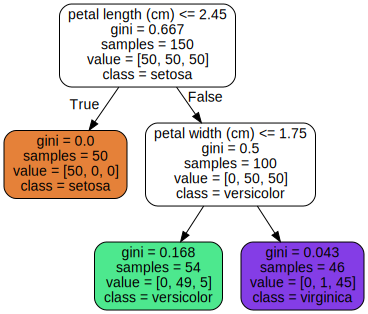

In [41]:
graph = export_graphviz (tree_clf,
                 feature_names = iris_data.feature_names[2:],
                 class_names = iris_data.target_names,
                 filled=True,
                 rounded=True)

plot = graphviz.Source(graph, format="png")
plot

In [42]:
# Predicting the probabilities
print(tree_clf.predict_proba([[5,1.5]]))
# Predicting the class
print(tree_clf.predict([[5,1.5]]))


[[0.         0.90740741 0.09259259]]
[1]


In [ ]:
def plotDecisionBoundaries():
  pass



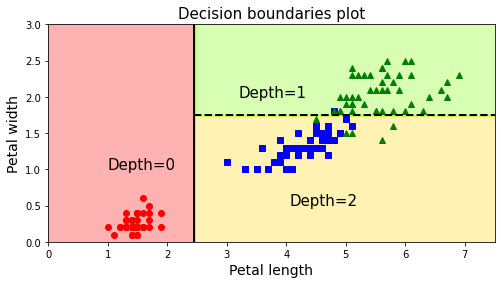

In [77]:



def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["red", "gold", "lawngreen",])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(["red", "gold", "lawngreen"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 2, "Depth=1", fontsize=15)
plt.text(4.05, 0.5, "Depth=2", fontsize=15)
plt.title("Decision boundaries plot",fontsize=15)
plt.savefig("decisionBound")


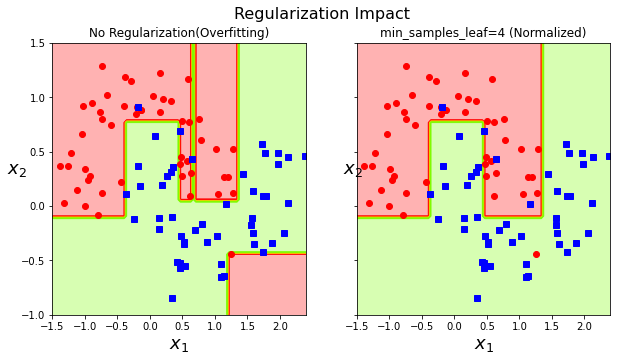

In [81]:
# Impact of regularization parameter to avoid the overfitting problems

from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=4)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No Regularization(Overfitting)", fontsize=12)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf=4 (Normalized)", fontsize=12)
plt.suptitle("Regularization Impact",fontsize=16)
plt.savefig("reglDecisionTree")
